In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [6]:
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
headers = {"User-Agent": "JL-WebScraping-Training/1.0 (educational project)"}

response = requests.get(url, headers=headers, timeout=30)
response.raise_for_status()

soup = BeautifulSoup(response.text, "html.parser")

table = soup.find_all("table", class_="wikitable")[0]
rows = table.find_all("tr")

data = []
for row in rows[1:]:
    cells = row.find_all(["th", "td"])
    cell_texts = [c.get_text(" ", strip=True) for c in cells]
    if len(cell_texts) == 6:
        data.append(cell_texts)

columns = ["rank", "song", "artist", "streams_billions", "release_date", "ref"]
df = pd.DataFrame(data, columns=columns)

# Limpieza mínima necesaria para graficar bien
df["rank"] = pd.to_numeric(df["rank"], errors="coerce")
df["song"] = df["song"].str.replace('"', "", regex=False).str.strip()
df["artist"] = df["artist"].str.replace(r"\s+", " ", regex=True).str.strip()
df["streams_billions"] = pd.to_numeric(df["streams_billions"], errors="coerce")

df = df.dropna(subset=["rank", "song", "artist", "streams_billions"]).copy()

df.head()


,rank,song,artist,streams_billions,release_date,ref
0,1,Blinding Lights,The Weeknd,5.228,29 November 2019,[ 1 ]
1,2,Shape of You,Ed Sheeran,4.721,6 January 2017,[ 2 ]
2,3,Sweater Weather,The Neighbourhood,4.304,3 December 2012,[ 3 ]
3,4,Starboy,The Weeknd and Daft Punk,4.303,21 September 2016,[ 4 ]
4,5,As It Was,Harry Styles,4.192,1 April 2022,[ 5 ]


In [7]:
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
headers = {"User-Agent": "JL-WebScraping-Training/1.0 (educational project)"}

response = requests.get(url, headers=headers, timeout=30)

print("Status:", response.status_code)
print("Primeros 120 caracteres:", response.text[:120])


Status: 200
Primeros 120 caracteres: <!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-


In [8]:
html = response.text
soup = BeautifulSoup(html, "html.parser")

wikitables = soup.find_all("table", class_="wikitable")
print("Número de wikitables:", len(wikitables))

table0 = wikitables[0]
print("Primeros 200 caracteres de la tabla 0:")
print(str(table0)[:200])



Número de wikitables: 25
Primeros 200 caracteres de la tabla 0:
<table class="wikitable sortable plainrowheaders">
<tbody><tr>
<th>Rank
</th>
<th>Song
</th>
<th>Artist(s)
</th>
<th>Streams<br/>(billions)
</th>
<th>Release date
</th>
<th class="unsortable"><abbr ti


In [9]:
rows = table0.find_all("tr")
print("Filas totales (incluye encabezado):", len(rows))

for i, row in enumerate(rows[1:6], start=1):
    cells = row.find_all(["th", "td"])
    cell_texts = [c.get_text(" ", strip=True) for c in cells]
    print(f"\nFila completa {i}:")
    print(cell_texts)



Filas totales (incluye encabezado): 102

Fila completa 1:
['1', '" Blinding Lights "', 'The Weeknd', '5.228', '29 November 2019', '[ 1 ]']

Fila completa 2:
['2', '" Shape of You "', 'Ed Sheeran', '4.721', '6 January 2017', '[ 2 ]']

Fila completa 3:
['3', '" Sweater Weather "', 'The Neighbourhood', '4.304', '3 December 2012', '[ 3 ]']

Fila completa 4:
['4', '" Starboy "', 'The Weeknd and Daft Punk', '4.303', '21 September 2016', '[ 4 ]']

Fila completa 5:
['5', '" As It Was "', 'Harry Styles', '4.192', '1 April 2022', '[ 5 ]']


In [10]:
data = []

for row in rows[1:]:
    cells = row.find_all(["th", "td"])
    cell_texts = [c.get_text(" ", strip=True) for c in cells]
    if len(cell_texts) == 6:
        data.append(cell_texts)

columns = ["rank", "song", "artist", "streams_billions", "release_date", "ref"]
df = pd.DataFrame(data, columns=columns)

print("Filas en df:", len(df))
df.head()


Filas en df: 100


,rank,song,artist,streams_billions,release_date,ref
0,1,""" Blinding Lights """,The Weeknd,5.228,29 November 2019,[ 1 ]
1,2,""" Shape of You """,Ed Sheeran,4.721,6 January 2017,[ 2 ]
2,3,""" Sweater Weather """,The Neighbourhood,4.304,3 December 2012,[ 3 ]
3,4,""" Starboy """,The Weeknd and Daft Punk,4.303,21 September 2016,[ 4 ]
4,5,""" As It Was """,Harry Styles,4.192,1 April 2022,[ 5 ]


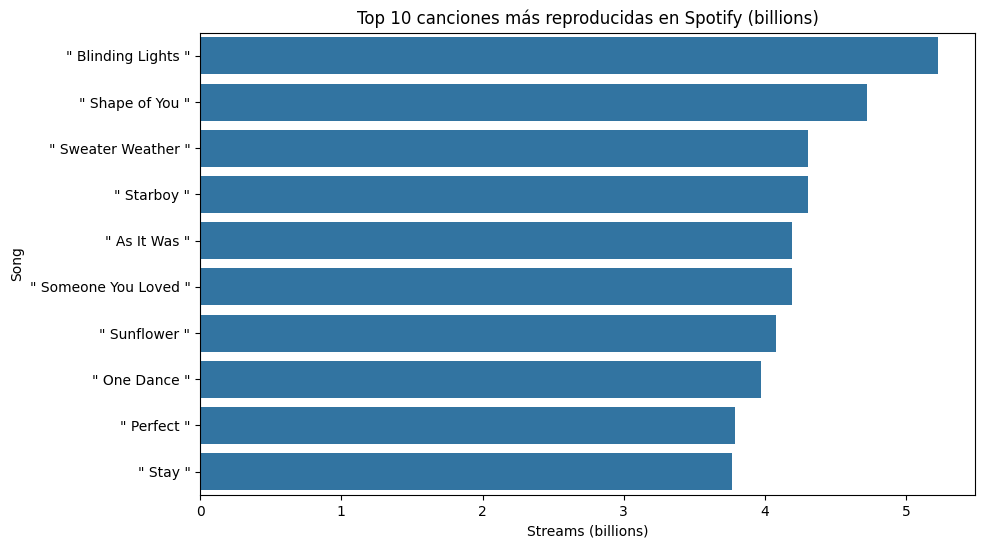

In [11]:
# Convertimos streams a número para poder ordenar y graficar
df["streams_billions"] = pd.to_numeric(df["streams_billions"], errors="coerce")
df = df.dropna(subset=["streams_billions"]).copy()

top10 = df.sort_values("streams_billions", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, y="song", x="streams_billions", orient="h")
plt.title("Top 10 canciones más reproducidas en Spotify (billions)")
plt.xlabel("Streams (billions)")
plt.ylabel("Song")
plt.show()


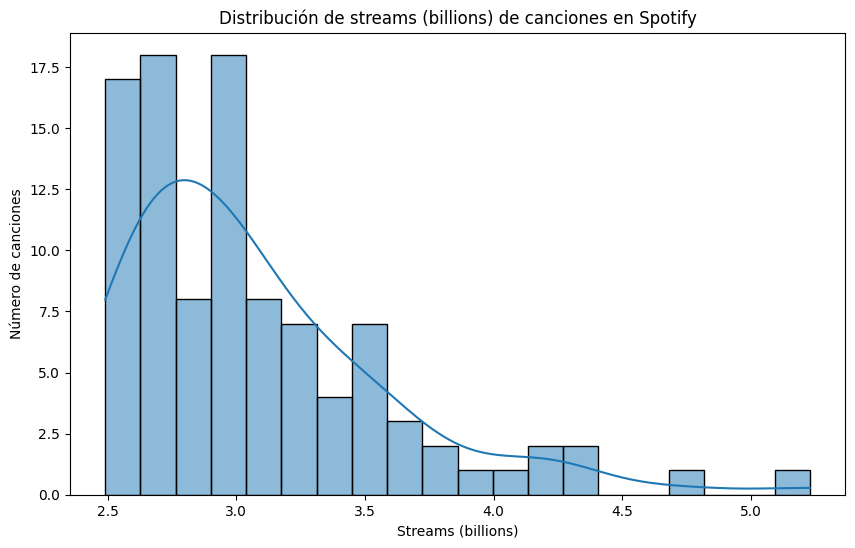

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df["streams_billions"], bins=20, kde=True)
plt.title("Distribución de streams (billions) de canciones en Spotify")
plt.xlabel("Streams (billions)")
plt.ylabel("Número de canciones")
plt.show()


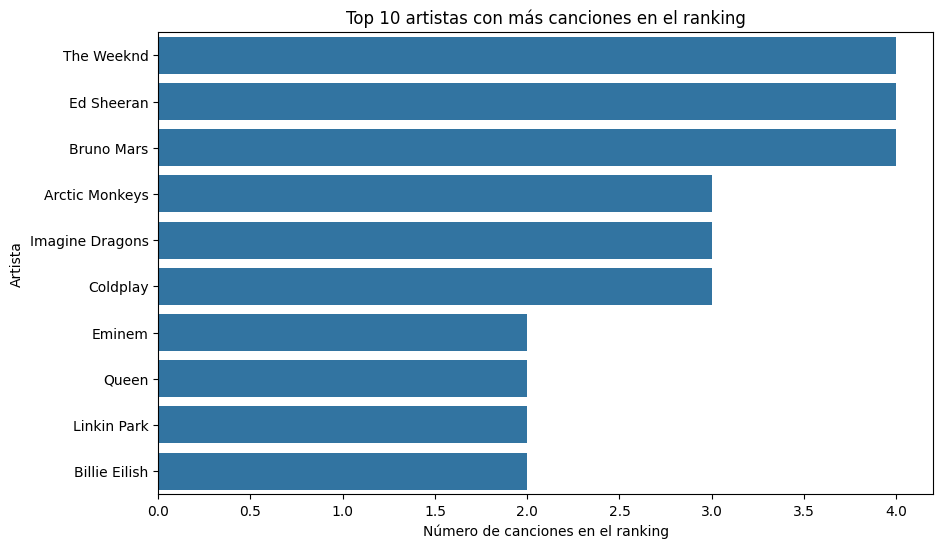

In [13]:
artist_counts = (
    df["artist"]
    .value_counts()
    .head(10)
    .reset_index()
)

artist_counts.columns = ["artist", "num_songs"]

plt.figure(figsize=(10, 6))
sns.barplot(data=artist_counts, y="artist", x="num_songs", orient="h")
plt.title("Top 10 artistas con más canciones en el ranking")
plt.xlabel("Número de canciones en el ranking")
plt.ylabel("Artista")
plt.show()
